    
<h1 style="text-align: center; color: purple;" markdown="1">Econ 320: Python Assignment 2 </h1>

<h2 style="text-align: center; color: #012169" markdown="1">A modification of computer exercise 4</h2>
<h2 style="text-align: center; color: #012169" markdown="1">Zhou Fang</h2>


## Package setup

In [1]:
# Import necessary packages here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats
from IPython.core.display import HTML


Use the dataset ATTEND for this exercise, and the handouts to work on these questions 

## (i)	Obtain the minimum, maximum, and average values for the variables `atndrte`, `priGPA`, and `ACT`.  Do it this two ways to practice.

In [2]:
# Load dataset attend

attend = woo.dataWoo('attend')
tablestats = attend[['atndrte','priGPA','ACT']].agg(['mean','min','max'])
round(tablestats,3)

,atndrte,priGPA,ACT
mean,81.71,2.587,22.51
min,6.25,0.857,13.00
max,100.00,3.930,32.00


**Another way of doing it using .describe()**

In [3]:
attend[['atndrte','priGPA','ACT']].describe().round(3)

,atndrte,priGPA,ACT
count,680.000,680.000,680.000
mean,81.710,2.587,22.510
std,17.047,0.545,3.491
min,6.250,0.857,13.000
25%,75.000,2.190,20.000
50%,87.500,2.560,22.000
75%,93.750,2.943,25.000
max,100.000,3.930,32.000


## (ii) Estimate the model

$$atndrte = \beta_0 + \beta_1 priGPA + \beta_2 ACT + u$$ 

to make it easier create an object with the model and then show the summary. 

In [4]:
# estimate log-level model:
mc4 = smf.ols(formula='atndrte ~ priGPA + ACT', data = attend)
mc4 = mc4.fit()

# print results using summary:
print(f'results.summary(): \n{mc4.summary()}\n')


results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                atndrte   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sat, 10 Oct 2020   Prob (F-statistic):           3.39e-51
Time:                        11:51:47   Log-Likelihood:                -2776.1
No. Observations:                 680   AIC:                             5558.
Df Residuals:                     677   BIC:                             5572.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.7004      3.884

## (iii) Calculate the predicted atndrte ( $\hat{atndrte}$ ) for all values and the mean of this predicted value. Also, calculate the predicted value of `atndrte` for the average values of the independent variables. Compare results.  

> Note that these two are different coding-wise. The first method is the mean of the prediction, and the second is the prediction of the mean 

In [5]:
# find the mean of the prediction
print('Model1 \n Average predicted attendance rate is \n mean of yhat=', round(mc4.predict().mean(),5))

#find the prediction of the mean
means =  attend[['priGPA','ACT']].mean()

print('Model1 \n Predicted attendance rate for average GPA and ACT is \n yhat of mean x= ',
      round(mc4.predict(means)[0],5))
                      

Model1 
 Average predicted attendance rate is 
 mean of yhat= 81.70956
Model1 
 Predicted attendance rate for average GPA and ACT is 
 yhat of mean x=  81.70956


## (iv)	What is the predicted `atndrte` if `priGPA`= 3.65 and `ACT`= 20? What is the predicted difference in attendance rates between this and the the average $\hat{atndrte}$  above? 
<br>
In this case, do not use the `.predict()` function for your code. Instead, retrive the coeffients and calculate the equation. 
<br> 
$$atndrte = \hat\beta_0 + \hat\beta_1 3.65 + \hat\beta_2 20 + u$$

In [6]:
mc4.params

Intercept    75.700405
priGPA       17.260591
ACT          -1.716553
dtype: float64

In [7]:
# mean of the prediction 
yhat1 = np.mean(mc4.predict())

# calculate predicted atndrte for 3.65 GPA and 20 ACT using the above equation
yhat2 = mc4.params[0] +  mc4.params[1]*3.65 +  mc4.params[2]*20

print('yhat = ', round(yhat2,3))

print("Difference = ", round(yhat2 - yhat1,3))


yhat =  104.371
Difference =  22.661


## (v) Run two more models: one only for freshmen and another only for sophomores. Save the results in objects `mfre` and `msoph` respectively <br>
Freshmen : `attend['frosh']==1` <br>
Sophomores : `attend['soph']==1`

In [8]:
# compute OLS only for freshmen
mfre = smf.ols(formula = 'atndrte ~ priGPA + ACT', data = attend[attend['frosh']==1])
mfre = mfre.fit()

# compute OLS only for sophomores
msoph= smf.ols(formula = 'atndrte ~ priGPA + ACT', data = attend[attend['soph']==1])
msoph = msoph.fit()

## (vi) You know how to extract the parameters form the regression results, $R^2$ and the number of observation

Create one table comparing the paramters from the three models and another table comparing  $R^2$ and the number of observations,

The table below compares $\beta's$

In [9]:
# create a table to examine the parameters
table = pd.DataFrame({'All': round(mc4.params, 4),
                      'Freshmen': round(mfre.params, 4),
                      'Soph': round(msoph.params,4)})
table.style.format('{:,.3f}'.format)

# mc4.params, mc4.rsquared, mc4.nobs], axis=0)
# freshman = np.append(mfre.params.values[0:3], [mfre.rsquared, mfre.nobs])
# sophomore = np.append(msoph.params.values[0:3], [msoph.rsquared, msoph.nobs])
# Results = ['Intercept', 'priGPA', 'ACT', 'R2', 'nobs']
# table = [[all1, freshman, sophomore]]

,All,Freshmen,Soph
Intercept,75.700,76.507,74.887
priGPA,17.261,16.062,18.869
ACT,-1.717,-1.487,-1.898


The table below compares the $R^2$ and observations for the models estimated. 

In [10]:
#create a table to examine the 
table = pd.DataFrame({'All': [round(mc4.rsquared,3),round(mc4.nobs,3)],
                      'Freshmen': [round(mfre.rsquared,3),round(mfre.nobs,3)],
                      'Soph': [round(msoph.rsquared,3),round(msoph.nobs,3)]}, 
                       index = ['R2', 'obs'])
table.style.format('{:,.3f}'.format)

,All,Freshmen,Soph
R2,0.291,0.286,0.320
obs,680.000,158.000,392.000


## (vii) Calculate the correlation between the residuals and the `priGPA` for the first model. 

In [11]:
u_hat = mc4.resid
corrx_u_hat = round(np.corrcoef(attend['priGPA'], u_hat)[1,0],3)
# remember this accesses the first element of the correlation matrix

print(f'Corr GPA and residuals:  \n', abs(corrx_u_hat))
# this number approximates to zero from the left hand side 
# so we use the absolute value so that it doesn't have a negative sign 

Corr GPA and residuals:  
 0.0


# From Computer Exercise 10 

Use the data in Wooldridge's HTV to answer this question. The data set includes information on wages, education, parents’ education, and several other variables for 1,230 working men in 1991. 

## (i)  Investigate some descriptive statistics

* What is the range of the `educ` variable in the sample?

In [12]:
# load the dataset
htv = woo.dataWoo('htv')

# find some descriptive statistics of the education variable
htv['educ'].describe() # summary provides the mean and max of the variable - therefore the range

count    1230.000000
mean       13.037398
std         2.354346
min         6.000000
25%        12.000000
50%        12.000000
75%        15.000000
max        20.000000
Name: educ, dtype: float64

* What percentage of men completed twelfth grade but no higher grade? 
    > Hint: use a logical expression and calculate the mean
* Do the men or their parents have, on average, higher levels of education?

In [13]:
t1 = htv['educ'].value_counts()

In [14]:
#calculate the percentage of men that did not complete more than high school
print("Percentage of men with HS= ", round(512/t1.sum(), 3))

Percentage of men with HS=  0.416


In [15]:
# create a table with average education for the men, their mothers, and their fathers
p = htv[['educ','motheduc','fatheduc']].mean()

pd.DataFrame(round(p,3), columns=["Averages"])

,Averages
educ,13.037
motheduc,12.178
fatheduc,12.447


## (ii)  Estimate the regression model <br>
$$educ = \beta_0 + \beta_1motheduc + \beta_2fatheduc + u$$ <br>
by OLS and report the results in the usual form. 

How much sample variation in `educ` is explained by parents’ education? Think about the interpretation of the coefficient on `motheduc`.

In [16]:
#print the regression results
smf.ols(formula='educ ~ motheduc + fatheduc', 
              data=htv).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     203.7
Date:                Sat, 10 Oct 2020   Prob (F-statistic):           4.13e-77
Time:                        11:51:48   Log-Likelihood:                -2621.7
No. Observations:                1230   AIC:                             5249.
Df Residuals:                    1227   BIC:                             5265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9644      0.320     21.776      0.000       6.337       7.592
motheduc       0.3042      0.032      9.528      0.000       0.242       0.367
fatheduc       0.1903      0.022      8.539      0.000       0.147       0.234
==============================================================================
Omnibus:                       60.519   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.103
Skew:                           0.455   Prob(JB):                     1.48e-18
Kurtosis:                       3.879   Cond. No.                         98.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (iii)  Add the variable `abil` (a measure of cognitive ability) to the regression from part (ii), and report the results in equation form. Does “ability” help to explain variations in education, even after controlling for parents’ education? Explain.

In [17]:
# print the new ols regressions results
smf.ols(formula='educ ~ motheduc + fatheduc + abil', 
              data=htv).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          5.95e-148
Time:                        11:51:48   Log-Likelihood:                -2455.0
No. Observations:                1230   AIC:                             4918.
Df Residuals:                    1226   BIC:                             4938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4487      0.290     29.180      0.000       7.881       9.017
motheduc       0.1891      0.029      6.635      0.000       0.133       0.245
fatheduc       0.1111      0.020      5.586      0.000       0.072       0.150
abil           0.5025      0.026     19.538      0.000       0.452       0.553
==============================================================================
Omnibus:                       52.055   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.086
Skew:                           0.465   Prob(JB):                     5.44e-14
Kurtosis:                       3.570   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, R squared increases from 0.249 to 0.428, which indicates better fitness. So we can say that the parameter "ability" helps to explain variations in education.

## (iv) Now estimate an equation where `abil` appears in quadratic form

In [18]:
# add in abil squared using numpy
m3 = smf.ols(formula='educ ~ motheduc + fatheduc + abil + np.power(abil,2)', 
              data = htv).fit()

#print the regression results
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     244.9
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          1.34e-154
Time:                        11:51:48   Log-Likelihood:                -2436.6
No. Observations:                1230   AIC:                             4883.
Df Residuals:                    1225   BIC:                             4909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.2402      0.287     28.671      0.000       7.676       8.804
motheduc              0.1901      0.028      6.767      0.000       0.135       0.245
fatheduc              0.1089      0.020      5.558      0.000       0.070       0.147
abil                  0.4015      0.030     13.255      0.000       0.342       0.461
np.power(abil, 2)     0.0506      0.008      6.093      0.000       0.034       0.067
==============================================================================
Omnibus:                       45.933   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.769
Skew:                           0.404   Prob(JB):                     4.71e-13
Kurtosis:                       3.674   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (v) Use the estimates in part (iv) to graph the relationship between the predicted `education` and `abil`. Set `motheduc` and `fatheduc` at their average values in the sample, 12.18 and 12.45, respectively. See handout for more. 


In [19]:
# look at the coeficients 
m3.params

Intercept            8.240226
motheduc             0.190126
fatheduc             0.108939
abil                 0.401462
np.power(abil, 2)    0.050599
dtype: float64

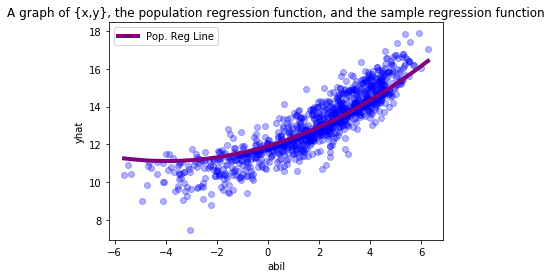

In [20]:
# set the proper variables 
htv['yhat'] = m3.fittedvalues
htv['resid'] = m3.resid
c = m3.params[0] +  m3.params[1]*12.18 +  m3.params[2]*12.45
htv['yaveduc'] = m3.params[0] +  m3.params[1]*12.18 +  m3.params[2]*12.45 + m3.params[3]*htv['abil'] +  m3.params[4]*(htv['abil']**2)
htv.sort_values(by=['abil'], inplace=True)

# You need to sort the values by abil so that the line plots nicely. Try not doing it and see what happens
# htv.sort_values(by=['abil'], inplace=True)

# this does the scatter of the abil vs predicted education function
sns.regplot(x=htv['abil'], y=htv['yhat'], scatter_kws={"color": "blue", 'alpha': 0.3}, fit_reg=False,
            data=htv).set_title("log(Salary) vs log(Sales)")
# this adds the line that shows the quadratic relation between this two.
plt.plot(htv['abil'],htv['yaveduc'], color='purple', linewidth=4, label="Pop. Reg Line")
plt.title("A graph of {x,y}, the population regression function, and the sample regression function" )
plt.legend(loc='upper left')
plt.show()

<style>
div.gray { background-color:#dbdbdb; border-radius: 5px; padding: 20px;}
</style>
<div class = "gray">

**Packages used in this document**

`wooldridge`
`matplot.lib`
`pandas`
`numpy` 
`seaborn`
    

</div>

&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;